# Add noise to data
Compare original vs noisy data

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_types = ['additive', 'multiplicative', 'combined', 'inverse', 'inverse_combined']
noise_level = 5

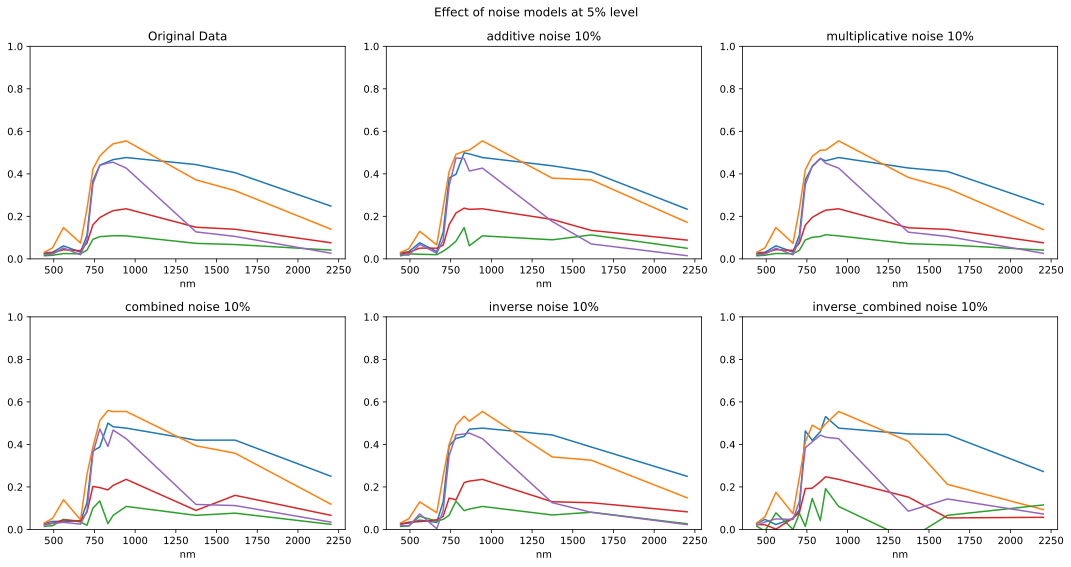

In [26]:
df = pd.concat(dfs, axis=0, ignore_index=True)

cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

df_sample = df.sample(5, random_state=42)
axs[0].set_title('Original Data')
axs[0].plot(x, df_sample[cols].T, linestyle='-')
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_types):
  df_noisy = pd.read_pickle(noisy_path + n + f'{noise_level}' +'.pkl')
  df_noisy_sample = df_noisy.sample(5, random_state=42)
  
  axs[i+1].set_title(f'{n} noise 10%')
  axs[i+1].plot(x, df_noisy_sample[cols].T, linestyle='-')
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 

plt.suptitle(f'Effect of noise models at {noise_level}% level')
plt.tight_layout()
  

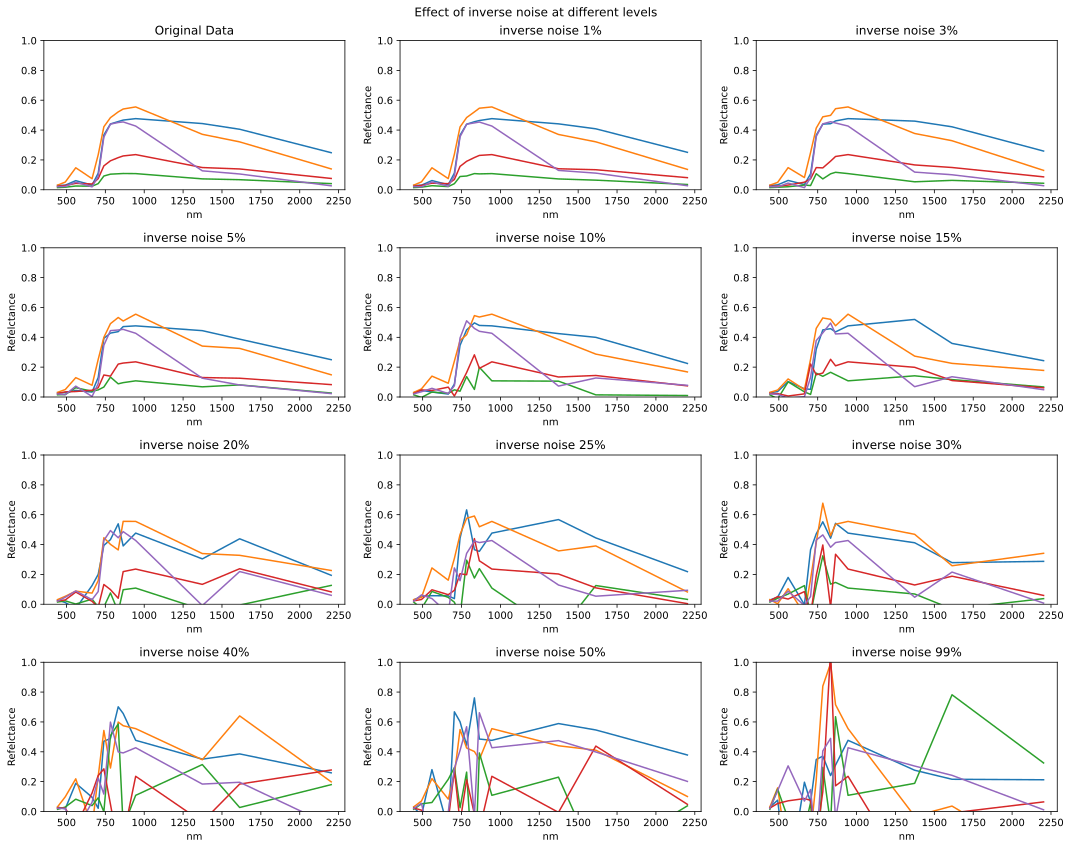

In [32]:
# Compare one model at different levels

data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_type = 'inverse' #, 'multiplicative', 'combined', 'inverse', 'inverse_combined']
noise_levels = [1,3,5,10,15,20,25,30,40,50,99]



df = pd.concat(dfs, axis=0, ignore_index=True)

cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axs = axs.flatten()

df_sample = df.sample(5, random_state=42)
axs[0].set_title('Original Data')
axs[0].plot(x, df_sample[cols].T, linestyle='-')
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_levels):
  df_noisy = pd.read_pickle(noisy_path + noise_type + f'{n}' +'.pkl')
  df_noisy_sample = df_noisy.sample(5, random_state=42)
  
  axs[i+1].set_title(f'{noise_type} noise {n}%')
  axs[i+1].plot(x, df_noisy_sample[cols].T, linestyle='-')
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 
  axs[i+1].set_ylabel('Refelctance') 

plt.suptitle(f'Effect of {noise_type} noise at different levels')
plt.tight_layout()
  

In [56]:
df_noisy_sample[cols].T.values[-1]

array([0.25297739])

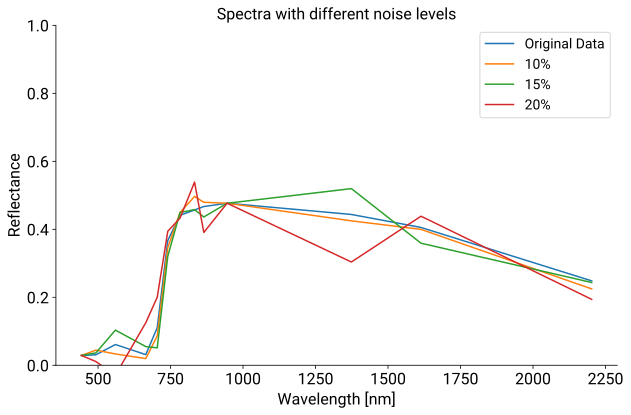

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data paths and variables are defined as in the original code
cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

# Read the data
if isinstance(data_path, str):
    df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
    dfs = [pd.read_pickle(path) for path in data_path]
    df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_type = 'inverse'  # 'multiplicative', 'combined', 'inverse', 'inverse_combined'
noise_levels = [10, 15, 20]

# Prepare the plot
fig, ax = plt.subplots(figsize=(9, 6))

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_LARGE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_LARGE)  # fontsize of the tick labels


plt.title('Spectra with different noise levels')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectance')

# Plot original data
df_sample = df.sample(1, random_state=42)
plt.plot(x, df_sample[cols].T, label='Original Data', linestyle='-')

# Define a nice color palette:
colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot noisy data
for i, n in enumerate(noise_levels):
    df_noisy = pd.read_pickle(noisy_path + noise_type + f'{n}' + '.pkl')
    df_noisy_sample = df_noisy.sample(1, random_state=42)
    plt.plot(x, df_noisy_sample[cols].T, label=f'{n}%', linestyle='-') #, color=colors[i])

    """ 
    # Text
    ax.text(
        x[-1] * 1.01,
        df_noisy_sample[cols].T.values[-1],
        n,
        #color=colors[i],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )
    """ 

# Hide the top and right spine
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Add legend
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Plot validation spectra to see what it looks like

In [6]:
val_path = '../../results/validation_data_extended_lai.pkl'
val_df = pd.read_pickle(val_path)

In [8]:
val_df.head()

,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,geometry,date,lai,location,green_canopy_cover
2,0.0198,0.0488,0.0295,0.0788,0.2574,0.3147,0.3184,0.3346,0.1394,0.0760,POINT (9.06923 47.66701),2022-05-11 09:48:44,2.77,Arenenberg,NaN
4,0.0322,0.0490,0.0340,0.0715,0.2518,0.3346,0.3236,0.3461,0.1229,0.0693,POINT (9.06921 47.66710),2022-05-19 13:14:04,3.67,Arenenberg,NaN
5,0.0556,0.0857,0.0572,0.1342,0.3260,0.3996,0.4120,0.4260,0.1929,0.1080,POINT (9.06926 47.66706),2022-06-15 11:45:12,3.78,Arenenberg,NaN
8,0.0164,0.0438,0.0268,0.0725,0.2618,0.3215,0.3240,0.3400,0.1333,0.0664,POINT (9.06856 47.66724),2022-05-11 09:58:08,2.80,Arenenberg,NaN
10,0.0280,0.0455,0.0290,0.0717,0.2449,0.3348,0.3316,0.3515,0.1148,0.0624,POINT (9.06850 47.66722),2022-05-19 13:20:06,3.54,Arenenberg,NaN


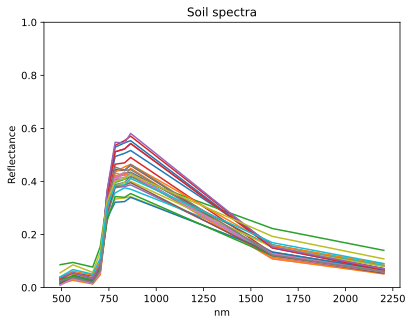

In [30]:
import matplotlib.pyplot as plt

# Define your DataFrame df and the columns of interest
cols = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
x = [492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 1613.7, 2202.4]

val_df[cols].sample(30).T.set_index(pd.Index(x)).plot(legend=False)
plt.xlabel('nm')
plt.ylabel('Reflectance')
plt.title('Soil spectra')
plt.ylim((0,1))
plt.ylabel('Reflectance')
plt.xlabel('nm')
plt.show()